In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score, recall_score
)
from sklearn.metrics import precision_score, recall_score, f1_score
df = pd.read_csv("Housing.csv") 
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df = df.apply(lambda x: x.map({'yes': 1, 'no': 0}) if x.dtypes == 'object' else x)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [10]:
median_price = df['price'].median()
df['price_class'] = (df['price'] > median_price).astype(int)  

X = df.drop(['price', 'price_class'], axis=1)
y = df['price_class']
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_class
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,1
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,1
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data prepared successfully!")
print("Training shape:", X_train_scaled.shape)
print("Testing shape:", X_test_scaled.shape)
print("Target distribution:\n", y.value_counts())




Data prepared successfully!
Training shape: (436, 12)
Testing shape: (109, 12)
Target distribution:
 price_class
0    275
1    270
Name: count, dtype: int64


In [25]:

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", (100*accuracy_score(y_test, y_pred)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Model Evaluation:
Accuracy: 85.3211009174312

Confusion Matrix:
 [[46  9]
 [ 7 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        55
           1       0.84      0.87      0.85        54

    accuracy                           0.85       109
   macro avg       0.85      0.85      0.85       109
weighted avg       0.85      0.85      0.85       109



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        55
           1       0.84      0.87      0.85        54

    accuracy                           0.85       109
   macro avg       0.85      0.85      0.85       109
weighted avg       0.85      0.85      0.85       109



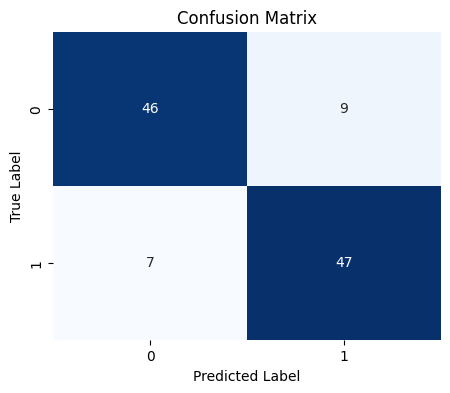

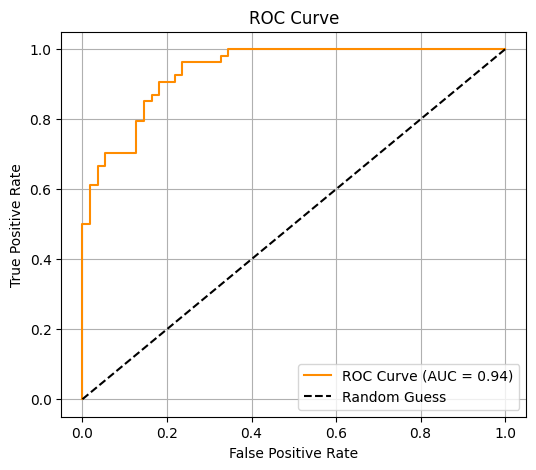

In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

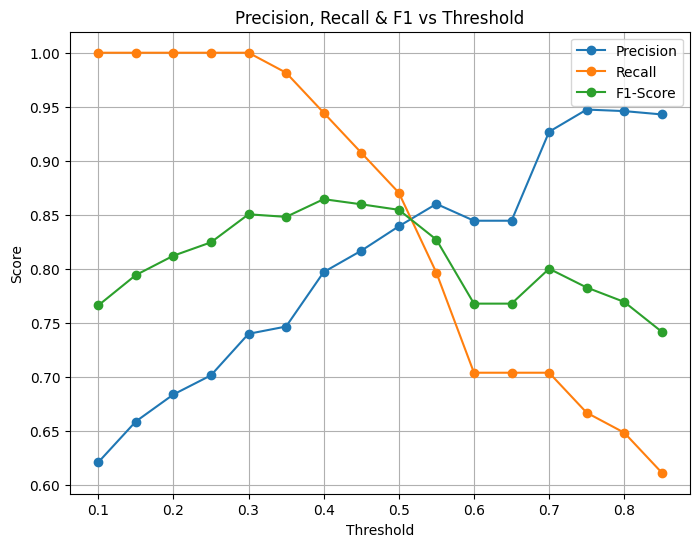

Best Threshold based on F1: 0.40


In [29]:
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)
precisions, recalls, f1s = [], [], []

for t in thresholds:
    y_pred_tuned = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_tuned))
    recalls.append(recall_score(y_test, y_pred_tuned))
    f1s.append(f1_score(y_test, y_pred_tuned))

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions, label="Precision", marker='o')
plt.plot(thresholds, recalls, label="Recall", marker='o')
plt.plot(thresholds, f1s, label="F1-Score", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold based on F1: {best_thresh:.2f}")
